Se importan librerias a utilizar.

In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics
import seaborn as sns

from math import sqrt

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import time
import itertools
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
# Librerías para la partición de datos y la evaluación del modelo
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
import copy



warnings.filterwarnings("ignore")

Se lee el csv MY2022FuelConsumptData sacando headers.

In [2]:
dt=pd.read_csv('MY2022FuelConsumptData.csv', sep=(';'), header= None)
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,Model,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se filtra las filas y las columnas que realmente tiene los registros. (sacamos los comentarios de cada variable y los headers mas organizados con sus unidades)

In [3]:
# Seleccionar registros desde el índice 2 (3er registro) hasta el índice 957 
df= dt.iloc[2:957]

In [4]:
df.shape

(955, 222)

In [5]:
df = df.iloc[:, :15]

Se le agregan los headers correspondientes a cada columna nuevamente.

In [6]:
df.columns = ['Model Year', 'Make', 'Model', 'Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Type','Fuel Consumption City (L/100 km)','Hwy (L/100 km)','Comb (L/100 km)','Comb (mpg)','CO2 Emissions (g/km)','CO2 Rating','Smog Rating']

In [7]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
2,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
3,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
5,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
6,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


Breve explicación de cada variable en el conjunto de datos:

Engine Size(L): Tamaño del motor en litros. Representa el volumen total de todos los cilindros en el motor.

Cylinders: Número de cilindros en el motor. Un motor puede tener diferentes configuraciones de cilindros, como 4, 6 u 8 cilindros.

Fuel Consumption City (L/100 km): Consumo de combustible en litros por cada 100 kilómetros en condiciones de conducción en ciudad. Indica la eficiencia de combustible en entornos urbanos.

Hwy (L/100 km): Consumo de combustible en litros por cada 100 kilómetros en carretera. Muestra la eficiencia de combustible en condiciones de conducción en carretera.

Comb (L/100 km): Consumo de combustible combinado en litros por cada 100 kilómetros. Es un promedio ponderado del consumo de combustible en ciudad y carretera.

Comb (mpg): Consumo de combustible combinado en millas por galón. Es una medida alternativa del consumo de combustible en el sistema de unidades de los Estados Unidos.

CO2 Emissions (g/km): Emisiones de dióxido de carbono por kilómetro. Indica la cantidad de CO2 liberada por el vehículo durante la conducción.

CO2 Rating: Clasificación de las emisiones de dióxido de carbono. Un indicador de la eficiencia ambiental del vehículo.

Smog Rating: Clasificación de emisiones que contribuyen a la formación de smog. Otro indicador ambiental que evalúa la eficiencia del vehículo en la reducción de emisiones perjudiciales para la calidad del aire.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 2 to 956
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Model Year                        955 non-null    object
 1   Make                              955 non-null    object
 2   Model                             955 non-null    object
 3   Vehicle Class                     955 non-null    object
 4   Engine Size(L)                    955 non-null    object
 5   Cylinders                         955 non-null    object
 6   Transmission                      955 non-null    object
 7   Fuel Type                         955 non-null    object
 8   Fuel Consumption City (L/100 km)  955 non-null    object
 9   Hwy (L/100 km)                    955 non-null    object
 10  Comb (L/100 km)                   955 non-null    object
 11  Comb (mpg)                        955 non-null    object
 12  CO2 Emissions (g/km)  

Se convierten columnas de object a Int o float para poder trabajarlos.

In [9]:

# Lista de columnas que deseas convertir a enteros
columns_to_convert = ['Model Year', 'Engine Size(L)', 'Cylinders','Fuel Consumption City (L/100 km)','Hwy (L/100 km)','Comb (L/100 km)','Comb (mpg)', 'CO2 Rating','CO2 Emissions (g/km)','Smog Rating']

# Itera sobre las columnas y convierte a enteros
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

# Ahora, las columnas seleccionadas deben contener valores numéricos enteros


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 2 to 956
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Model Year                        955 non-null    int16  
 1   Make                              955 non-null    object 
 2   Model                             955 non-null    object 
 3   Vehicle Class                     955 non-null    object 
 4   Engine Size(L)                    955 non-null    float64
 5   Cylinders                         955 non-null    int8   
 6   Transmission                      955 non-null    object 
 7   Fuel Type                         955 non-null    object 
 8   Fuel Consumption City (L/100 km)  955 non-null    float64
 9   Hwy (L/100 km)                    955 non-null    float64
 10  Comb (L/100 km)                   955 non-null    float64
 11  Comb (mpg)                        955 non-null    int8   
 12  CO2 Emis

In [11]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
2,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
3,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
5,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
6,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


Se cambian a int las variables categoricas

In [12]:
# Lista de columnas para hot encoding
columns_to_encode = ['Model Year', 'Make', 'Model','Vehicle Class','Transmission','Fuel Type']
enc = OrdinalEncoder()
X_hot_enconder = df[columns_to_encode]
X_hot_enconder = enc.fit_transform(X_hot_enconder)
df[columns_to_encode] = X_hot_enconder

In [13]:
df.drop(["Model Year"], axis=1, inplace=True)

In [14]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
2,0.0,358.0,0.0,2.4,4,7.0,3.0,9.9,7.0,8.6,33,200,6,3
3,0.0,418.0,7.0,3.5,6,8.0,3.0,12.6,9.4,11.2,25,263,4,5
4,0.0,521.0,7.0,2.0,4,8.0,3.0,11.0,8.6,9.9,29,232,5,6
5,0.0,522.0,7.0,2.0,4,8.0,3.0,11.3,9.1,10.3,27,242,5,6
6,0.0,623.0,0.0,2.0,4,8.0,3.0,11.2,8.0,9.8,29,230,5,7


Usamos seaborn para mapa de calor y ver la relacion de variables.

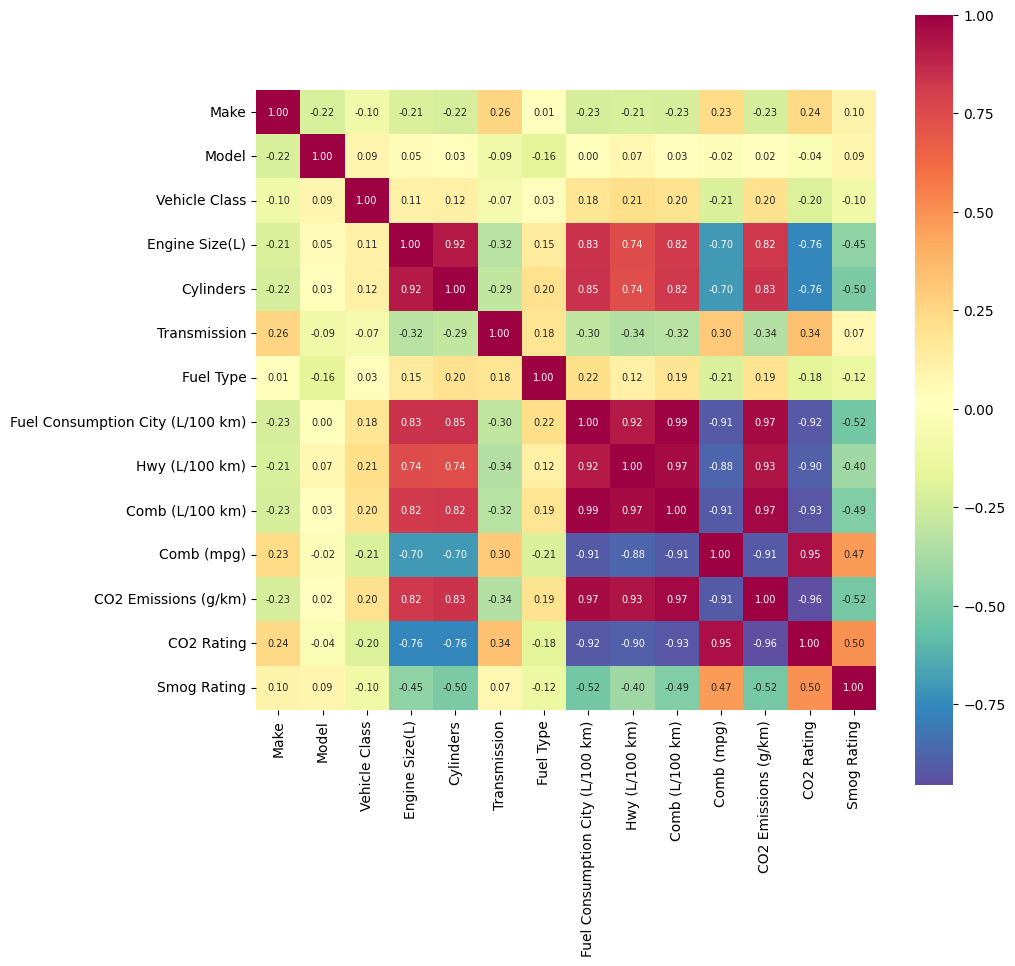

In [15]:
"""con el mapa de calor se muestra que variables que tiene alta relacion entre si
"""
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))

# Se define la configuración del mapa de calor
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 7}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.style.use('ggplot')
plt.show()

In [16]:
columns_to_normalize =['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Hwy (L/100 km)',	'Comb (L/100 km)',	'Comb (mpg)', 'CO2 Emissions (g/km)']
another_columns = [c for c in df.columns if c not in columns_to_normalize ]
df_normalized = copy.deepcopy(df)
scaler = StandardScaler()

df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])
df_normalized[another_columns] = df[another_columns]


**1.Elegir  una  única  variable  explicativa  y  ajustar  un  modelo  de  regresión  lineal.Calcular diferentes métricas que nos sirvan para evaluar el modelo como el error cuadrático medio y el coeficiente de determinación.**


Aplicamos una regresion lineal con las variables seleccionadas comb(mpg) y Engine Size(L). Se puede apreciar que hay una tendencia a que mientras mayor se el tamaño del motor 'Engine Size(L)', la cantidad de millas que se puede recorrer con un tanque disminuye 'Comb (mpg)'.

In [17]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
2,0.0,358.0,0.0,2.4,4,7.0,3.0,9.9,7.0,8.6,33,200,6,3
3,0.0,418.0,7.0,3.5,6,8.0,3.0,12.6,9.4,11.2,25,263,4,5
4,0.0,521.0,7.0,2.0,4,8.0,3.0,11.0,8.6,9.9,29,232,5,6
5,0.0,522.0,7.0,2.0,4,8.0,3.0,11.3,9.1,10.3,27,242,5,6
6,0.0,623.0,0.0,2.0,4,8.0,3.0,11.2,8.0,9.8,29,230,5,7


In [18]:
def desnormalize_column(data, column_name):
    """
    Desnormaliza una columna específica en un conjunto de datos dado.

    data: DataFrame o Serie de Pandas que contiene la columna normalizada.
    column_name: El nombre de la columna que se desea desnormalizar.
    
    return: Array con los valores desnormalizados de la columna especificada.
    """
    # Encuentra el índice de la columna en la lista de columnas normalizadas
    column_index = columns_to_normalize.index(column_name)

    # Crea una matriz 'dummy' para las otras columnas normalizadas
    dummy_data = np.zeros((data.shape[0], len(columns_to_normalize)))

    # Reemplaza la columna deseada con los datos de 'data'
    if isinstance(data, pd.DataFrame):
        dummy_data[:, column_index] = data.iloc[:, 0].values
    elif isinstance(data, pd.Series):
        dummy_data[:, column_index] = data.values
    else:
        dummy_data[:, column_index] = data

    # Desnormaliza la matriz completa
    desnormalized_data = scaler.inverse_transform(dummy_data)

    # Extrae la columna desnormalizada
    column_desnormalized = desnormalized_data[:, column_index]

    return column_desnormalized

Mean Squared Error: 0.36596247660160114
R2 score 0.5450308255988185


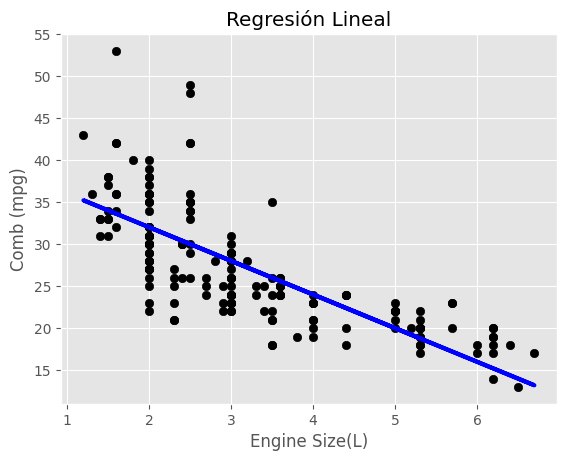

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame

# Selecciona la variable dependiente y la variable explicativa
y_column = 'Comb (mpg)'
x_column = 'Engine Size(L)'

# Filtra las filas con valores no nulos en las columnas seleccionadas
df_filtered = df_normalized[[y_column, x_column]].dropna()

# Divide el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_normalized[[x_column]], df_normalized[y_column], test_size=0.2, random_state=42)

# Inicializa y entrena el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Crear una matriz con la misma forma que la matriz original normalizada
dummy_data = np.zeros((X_test.shape[0], len(columns_to_normalize)))

engine_size_test_desnormalized = desnormalize_column(X_test, "Engine Size(L)")
y_test_desnormalized = desnormalize_column(y_test, y_column)
y_pred_test_desnormalized = desnormalize_column(y_pred, y_column)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f'Mean Squared Error: {mse}')
print(f"R2 score {r2}")
# Visualiza el modelo
plt.scatter(engine_size_test_desnormalized, y_test_desnormalized, color='black')
plt.plot(engine_size_test_desnormalized, y_pred_test_desnormalized, color='blue', linewidth=3)
plt.title('Regresión Lineal')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

**2.Elegir varias variables explicativas y ajustar un modelo de regresión lineal múltiple. Calcular diferentes métricas que nos sirvan para evaluar el modelo como el error cuadrático medio y el coeficiente de determinación.**

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que 'df' es tu DataFrame y selecciona las variables explicativas
features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Hwy (L/100 km)']

# Selecciona la variable dependiente
target = 'Comb (mpg)'

# Filtra las filas con valores no nulos en las columnas seleccionadas
df_filtered = df[features + [target]].dropna()

# Divide el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_filtered[features], df_filtered[target], test_size=0.2, random_state=42)

# Inicializa y entrena el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calcula el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Otros coeficientes del modelo
coefficients = model.coef_
intercept = model.intercept_
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Mean Squared Error: 4.541195079204789
R-squared: 0.9043346408726551
Coefficients: [-0.0927556   1.05057732 -2.13155466 -0.57894078]
Intercept: 53.74265811895382


**Error Cuadrático Medio (MSE):** es una medida de la calidad del modelo de regresión. En este caso, el valor de MSE es 4.54, lo que indica que, en promedio, las predicciones del modelo están desviadas en aproximadamente 4.54 unidades al cuadrado del valor real. Un MSE más bajo indica un mejor ajuste del modelo.


**Coeficiente de Determinación (R-squared):** es una medida de cuánto de la variabilidad en la variable dependiente es explicada por el modelo. Un valor de 0.90 sugiere que el 90% de la variabilidad en la variable 'Comb (mpg)' puede ser explicada por las variables explicativas seleccionadas. Este es un buen indicativo de la capacidad explicativa del modelo.


**Coeficientes del Modelo:** indican la relación entre cada variable explicativa y la variable dependiente. Por ejemplo, un coeficiente positivo para 'Cylinders' (1.05) sugiere que, manteniendo las otras variables constantes, un aumento de una unidad en el número de cilindros se asocia con un aumento de aproximadamente 1.05 unidades en 'Comb (mpg)'.


**Intercepto:**: (53.74) es el valor esperado de 'Comb (mpg)' cuando todas las variables explicativas son cero. En este contexto, puede interpretarse como el 'Comb (mpg)' predicho cuando las otras variables explicativas son nulas.
En general, estos resultados sugieren que el modelo tiene un buen ajuste y explica gran parte de la variabilidad en la variable dependiente. Sin embargo, es importante considerar también el contexto específico del problema y realizar validación adicional del modelo si es necesario.

**3.Elegir  varias  variables  explicativas  y  ajustar  un  modelo  de  regresión múltiple, combinación  entre lineal y  no  lineal  (para  una  de  las  variables).  Calcular diferentes  métricas  que  nos  sirvan  para  evaluar  el  modelo  como  el  error cuadrático medio y el coeficiente de determinación.**

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Supongamos que 'df' es tu DataFrame y selecciona las variables explicativas
features_linear = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Hwy (L/100 km)']
feature_nonlinear = 'Engine Size(L)'

# Selecciona la variable dependiente
target = 'Comb (mpg)'

# Filtra las filas con valores no nulos en las columnas seleccionadas
df_filtered = df[features_linear + [feature_nonlinear, target]].dropna()

# Divide el conjunto de datos en conjunto de entrenamiento y prueba
X_linear = df_filtered[features_linear]
X_nonlinear = df_filtered[[feature_nonlinear]]
y = df_filtered[target]

X_linear_train, X_linear_test, X_nonlinear_train, X_nonlinear_test, y_train, y_test = train_test_split(X_linear, X_nonlinear, y, test_size=0.2, random_state=42)

# Inicializa y entrena el modelo de regresión lineal múltiple para variables lineales
linear_model = LinearRegression()
linear_model.fit(X_linear_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_linear_pred = linear_model.predict(X_linear_test)

# Inicializa y entrena el modelo de regresión con una variable no lineal
poly = PolynomialFeatures(degree=2)  # Puedes ajustar el grado según tu necesidad
X_nonlinear_train_poly = poly.fit_transform(X_nonlinear_train)
X_nonlinear_test_poly = poly.transform(X_nonlinear_test)

nonlinear_model = LinearRegression()
nonlinear_model.fit(X_nonlinear_train_poly, y_train)

# Realiza predicciones en el conjunto de prueba
y_nonlinear_pred = nonlinear_model.predict(X_nonlinear_test_poly)

# Calcula el error cuadrático medio (MSE) y el coeficiente de determinación (R-squared) para ambos modelos
mse_linear = mean_squared_error(y_test, y_linear_pred)
r2_linear = r2_score(y_test, y_linear_pred)

mse_nonlinear = mean_squared_error(y_test, y_nonlinear_pred)
r2_nonlinear = r2_score(y_test, y_nonlinear_pred)

print(f'Linear Model - Mean Squared Error: {mse_linear}, R-squared: {r2_linear}')
print(f'Nonlinear Model - Mean Squared Error: {mse_nonlinear}, R-squared: {r2_nonlinear}')


Linear Model - Mean Squared Error: 4.541148143123824, R-squared: 0.9043356296337551
Nonlinear Model - Mean Squared Error: 20.397062649011012, R-squared: 0.5703130366726545


**Mean Squared Error (MSE):**

Para el modelo de regresión lineal el MSE es 4.54, mientras que para el modelo no lineal es considerablemente mayor, con un MSE de 20.40.
Un MSE más bajo indica un mejor ajuste del modelo. En este caso, el modelo lineal tiene un rendimiento superior en términos de precisión de predicción en comparación con el modelo no lineal.

**Coeficiente de Determinación (R-squared):**
El R-squared para el modelo de regresión lineal es 0.90, lo que sugiere que el 90% de la variabilidad en la variable dependiente se explica por las variables explicativas lineales.
En el caso del modelo no lineal, el R-squared es 0.57, indicando que el modelo no lineal explica el 57% de la variabilidad en la variable dependiente.
Un R-squared más alto indica un mejor ajuste del modelo a los datos. Nuevamente, el modelo lineal supera al modelo no lineal en este aspecto.


**4.Comparar los tresmodelos anteriores.**
En este caso, los resultados sugieren que el modelo de regresión lineal tiene un mejor rendimiento en términos de precisión y capacidad explicativa en comparación con el modelo no lineal. Sin embargo, siempre es importante considerar el contexto específico del problema y realizar validación cruzada o ajustes adicionales según sea necesario.